### Question 5 Results 
#### NOTE: All my observations and results are in this notebook. Even the report, wherever necessary, is made here. 
#### NOTE1: The below are all MSE losses. 
#### 25 neurons 

|       | Test_Tanh         | Train_Tanh        | Test_Relu         | Train_Relu        |
|-------|-------------------|-------------------|-------------------|-------------------|
| BP    | 339               | 145               | 47                | 23                |

#### 50 neurons 

|       | Test_Tanh         | Train_Tanh        | Test_Relu         | Train_Relu        |
|-------|-------------------|-------------------|-------------------|-------------------|
| BP    | 312               | 136               | 44                | 20                |

#### 75 neurons 

|       | Test_Tanh         | Train_Tanh        | Test_Relu         | Train_Relu        |
|-------|-------------------|-------------------|-------------------|-------------------|
| BP    | 66                | 26                | 50                | 23                |

In [96]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [97]:
#simulate the equation 
#generate the points 
mu, sigma = 0, 0.01 
e = np.random.normal(mu, sigma, 400)
x1 = np.random.uniform(low=-4, high=4, size=400)
x2 = np.random.uniform(low=-4, high=4, size=400)
y = 2*x1 + 3*x2 + e

## Question 1 

### Question 1.1

It is given that we should learn two parameters. This implies the following equation:\
$$ y = w_{1}x_{1} + w_{2}x_{2} $$
The loss function is given by: 
$$ J = \frac{1}{N}\sum_{i=1}^n{(pred_{i} - y_{i})}^2 $$ where pred comes from the above equation and y is the true value. Now, we have to minimise this function.\
From this we get the following two equations: 
$$w_{1} = w_{1} - \eta\frac{2}{N}\sum_{i=1}^n{(pred_{i} - y_{i})*x_{1i}} $$
$$w_{2} = w_{2} - \eta\frac{2}{N}\sum_{i=1}^n{(pred_{i} - y_{i})*x_{2i}} $$

### Question 1.2 
I am plotting the error surface for the above equation below. It looks like the curve is convex so it'll be easy for us to reach its minima

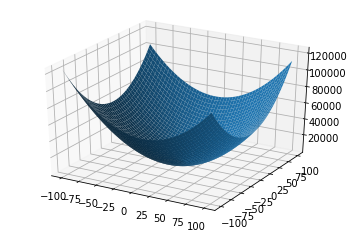

In [98]:
t0 = np.linspace(-100,100,400)
t1 = np.linspace(-100,100,400)
X,Y = np.meshgrid(t0,t1)
z = np.zeros((400,400))
for i in range(400):
    temp = np.zeros((400,))
    for j in range(400):
        pred = X[i,j]*x1 + Y[i,j]*x2   
        error = pred - y 
        loss = np.sum(error**2)
        z[i,j] = loss/400
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z) 

plt.show()

### Question 1.3

We know that $\eta_{opt} = \frac{1}{\lambda_{max}}$ where $\lambda_{max}$ is the highest eigen value of the Hessian. Now the objective function is 
$$ J = \frac{1}{N}\sum_{i=1}^n{(pred_{i} - y_{i})}^2 $$ where $pred_{i}$ is $y = w_{1}x_{1i} + w_{2}x_{2i}$. Now we have to differentiate this twice to get the Hessian. 
$$ \frac{\partial J}{\partial w_{1}} = {(pred_{i} - y_{i})*x_{1}} $$ \
$$ \frac{\partial J}{\partial w_{2}} = {(pred_{i} - y_{i})*x_{2}} $$ \
Second time: \
$$ \frac{\partial}{\partial w_{1}}\frac{\partial J}{\partial w_{2}} = \frac{\partial}{\partial w_{2}}\frac{\partial J}{\partial w_{1}} = x_{1}.x_{2} $$ \
$$ \frac{\partial^2 J}{\partial w_{1}^2} = 2x_{1}.x_{1} $$ \
$$ \frac{\partial^2 J}{\partial w_{2}^2} = 2x_{2}.x_{2} $$ \
So the Hessian is:
$$H = \left(\begin{array}{cc} 
2x_{1}.x_{1} & x_{1}.x_{2}\\
x_{1}.x_{2} & 2x_{2}.x_{2}
\end{array}\right) $$

Calculating $\lambda_{max}$ of H and $\eta_{opt}$ below

In [99]:
#Calculating 
elem1 = np.dot(x1, x1)
elem1 = 2*elem1 
elem2 = np.dot(x1, x2)
elem3 = elem2 
elem4 = np.dot(x2, x2)
elem4 = 2*elem4 
H = np.zeros((2,2))
H[0][0] = elem1 
H[0][1] = elem2
H[1][0] = elem3
H[1][1] = elem4 
# print(H)
eigenvals = np.linalg.eigvals(H)
print("Max Eigen value of Hessian is", max(eigenvals))
lr = 1/(max(eigenvals))
print("Optimum learning rate is",lr)

Max Eigen value of Hessian is 4613.835947187189
Optimum learning rate is 0.00021673939243757614


### Question 1.4
#### Part A

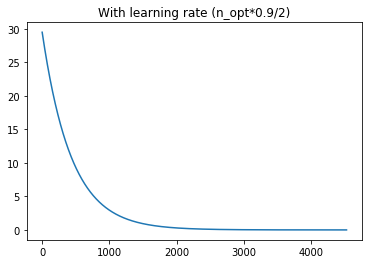

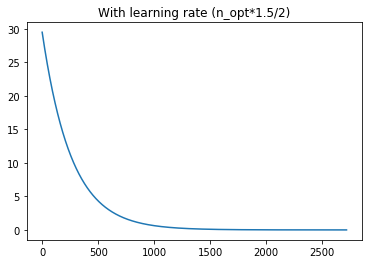

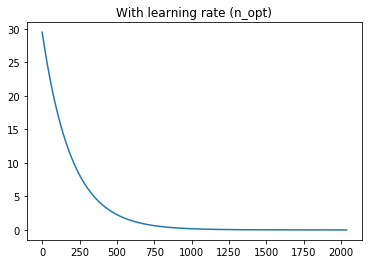

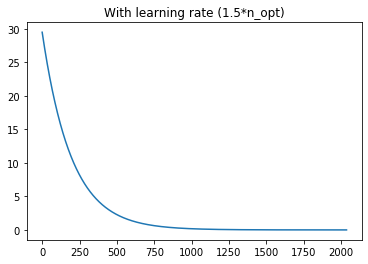

In [100]:
#Question 1.4 
#Part A 
def check_with_lr(curr_lr, title):
    loss = 1
    iters = []
    #initialising weights with 1. 
    w1 = 1
    w2 = 1
    i = 0
    loss_history = []
    while loss >= 0.001:
        iters.append(i)
        i+=1
        pred = w1*x1 + w2*x2
        error = pred - y 
        loss = np.sum(error**2)
        loss = loss/n
        loss_history.append(loss)
        w1 = w1 - curr_lr * 2 * np.sum(error*x1)/n
        w2 = w2 - curr_lr * 2 * np.sum(error*x2)/n
    plt.plot(iters, loss_history)
    plt.title(title)
    plt.show()
curr_lr = (lr*0.9)/2
check_with_lr(curr_lr, 'With learning rate (n_opt*0.9/2)')
curr_lr = (lr*1.5)/2
check_with_lr(curr_lr, 'With learning rate (n_opt*1.5/2)')
check_with_lr(lr, 'With learning rate (n_opt)')
curr_lr = (lr*1.5)
check_with_lr(lr, 'With learning rate (1.5*n_opt)')

All the above curves converge but ones with greater learning rate converge faster. So, it would make more sense to choose optimum learning rate or 1.5 * optimum learning rate for any optimisation. 

#### Part B 

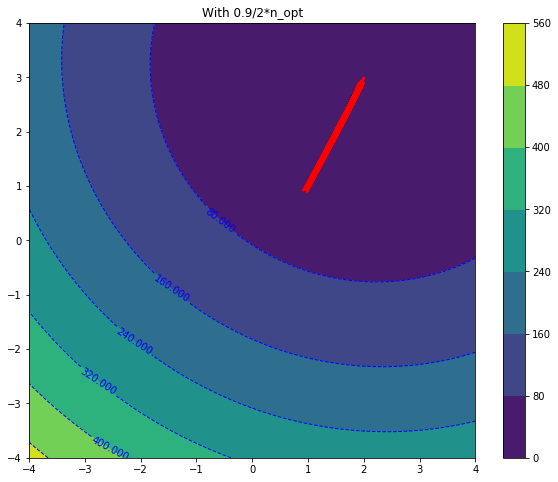

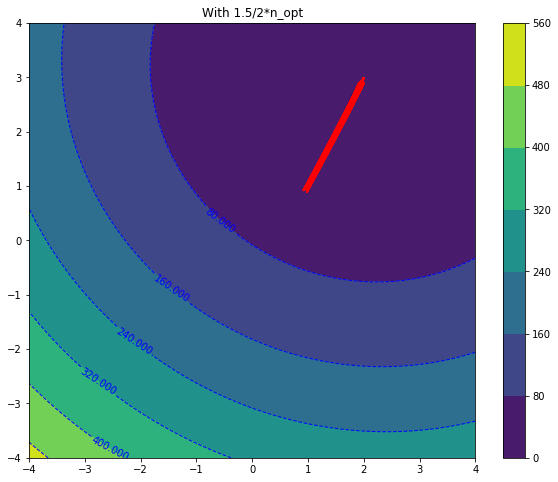

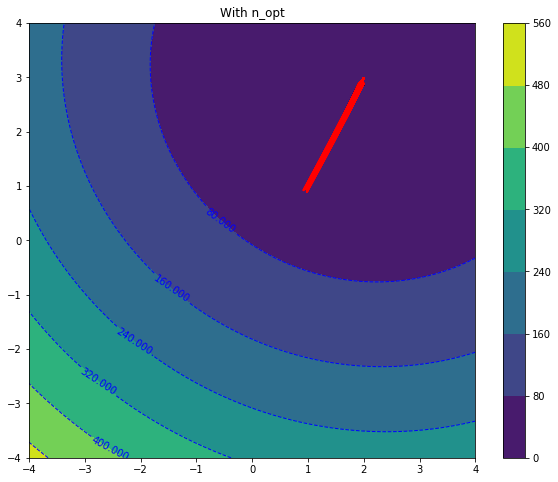

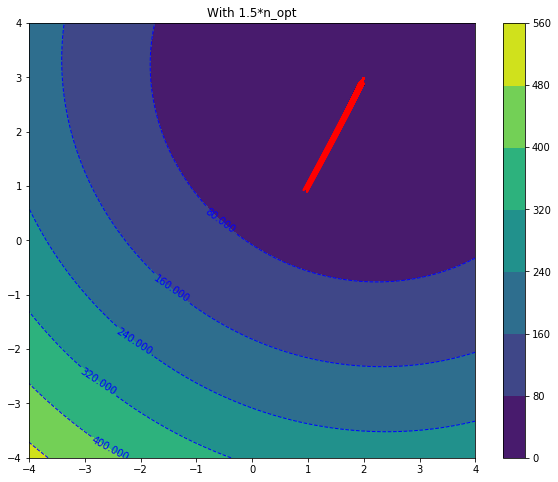

In [101]:
n = 400
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(w1,w2):
    pred = w1*x1 + w2*x2   
    error = pred - y 
#     print(error.shape)
    loss = np.sum(error**2)
    return loss/400

def gradient_descent(w1,w2, alpha = 0.0001,num_iters=200):
    pred = w1*x1 + w2*x2
    error = pred - y 
    x = np.zeros((2,))
    x[0] = w1
    x[1] = w2
    x[0] = x[0] - alpha* 2 * np.sum(error*x1)/n
    x[1] = x[1] - alpha* 2 * np.sum(error*x2)/n
    return x


def main(curr_lr, title): 
    t0 = np.linspace(-4,4,400)
    t1 = np.linspace(-4,4,400)
    X,Y = np.meshgrid(t0,t1)
    w = [1,1]
#     print(w[0])
    w_hist = []
    loss = 1
    while loss >= 0.001:
        loss = loss_function(w[0],w[1])
        gd = gradient_descent(w[0],w[1], curr_lr)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        w_hist.append(w)
        w = copy
    
    w_hist = np.array(w_hist)
    z = np.zeros((400,400))
    for i in range(400):
        temp = np.zeros((400,))
        for j in range(400):
            pred = X[i,j]*x1 + Y[i,j]*x2   
            error = pred - y 
            loss = np.sum(error**2)
            z[i,j] = loss/400
    plot(X,Y,z,w_hist, title)
main(0.9/2*lr, 'With 0.9/2*n_opt')
main(1.5/2*lr, 'With 1.5/2*n_opt')
main(lr, 'With n_opt')
main(1.5*lr, 'With 1.5*n_opt')

Again, we see the same thing. It takes more time if you take smaller learning rates. Taking $n_{opt}$ or $1.5 *n_{opt}$ would take us to the optimum value faster.  

## Question 2 

Given function is Rosenbrock function: \
$$ f(x,y) = x^2 + 100(y-x^2)^2 $$
There are two parameters: x, y <br>
Update rule: \
$$ x = x - \eta(2x - 400(y-x^2)) $$
$$ y = y - \eta200(y-x^2) $$

#### Constant Step Size 
Checking with normal plot curve to check whether it is converging first. 

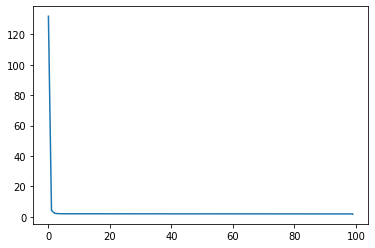

In [102]:
loss_history = []
iters = []
alpha = 0.001
loss = 0
x = np.random.uniform(low=-2, high=2, size=1)
y = np.random.uniform(low=-2, high=2, size=1)
x_list = []
y_list = []
x_list.append(x)
y_list.append(y)
def gradient(x, y):
    return x**2 + 100*(y-x**2)**2

for i in range(100):
    iters.append(i)
    loss = x**2 + 100*(y-x**2)**2
    x = x - alpha*(2*x - 400*x*(y - x**2))
    x_list.append(x)
    y = y - alpha*(200*(y - x**2))
    y_list.append(y)
    loss_history.append(loss)

iters.append(i)
loss = x**2 + 100*(y-x**2)**2
loss_history.append(loss)
x_list = np.array(x_list)
y_list = np.array(y_list)
plt.plot(iters, loss_history)
plt.show()


The contour for constant step size is shown below

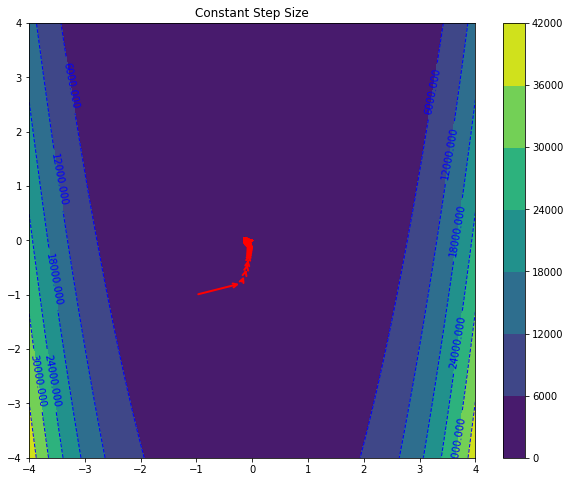

In [107]:
# alpha = 1e-3
#constant step size 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
    loss = x**2 + 100*(y-x**2)**2
    return loss

def gradient_descent(w1,w2, alpha = 0.001,num_iters=2000):
#     m = np.size(y)
    x = np.zeros((2,))
    x[0] = w1
    x[1] = w2
    x[0] = x[0] - alpha*(2*x[0] - 400*x[0]*(x[1] - x[0]**2))
    x[1] = x[1] - alpha*(200*(x[1] - x[0]**2))
    return x

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)

    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    loss = 1
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd = gradient_descent(w[0],w[1])
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        w_hist.append(w)
        w = copy
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'Constant Step Size')
main()

#### Polyak's momentum method 
Checking with loss vs epoch to check whether it is converging

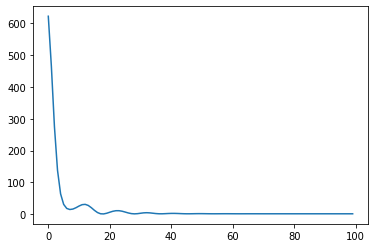

In [37]:
#Polyak's method 
loss_history = []
iters = []
loss = 0
alpha = 0.001
beta = 0.9
x = np.random.uniform(low=-2, high=2, size=1)
y = np.random.uniform(low=-2, high=2, size=1)
v = 0
r = 0
for i in range(100):
    iters.append(i)
    loss = x**2 + 100*(y-x**2)**2
    v = beta * v + (1 - beta) * (2*x - 400*x*(y - x**2))
    x = x - alpha * v 
    r = beta * r + (1 - beta) * (200*(y - x**2))
    y = y - alpha * r
    loss_history.append(loss)
plt.plot(iters, loss_history)
plt.show()

The contour plot for Polyak's momentum method is shown below 

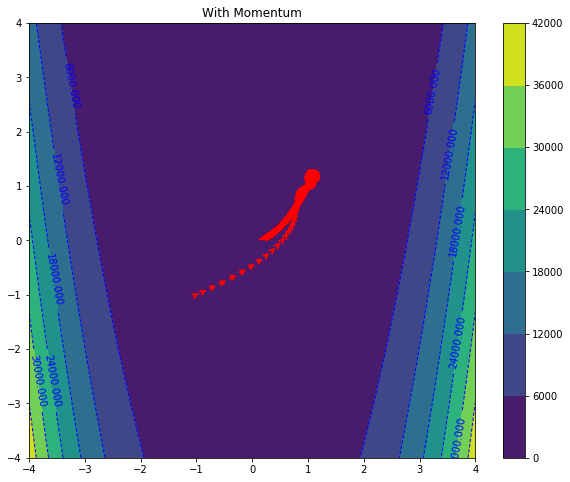

In [108]:

#Polyak's Momentum based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
    loss = x**2 + 100*(y-x**2)**2
    return loss

def gradient_descent(w1,w2,r,v,alpha = 0.001,num_iters=2000):
#     m = np.size(y)
    x = np.zeros((2,))
    x[0] = w1
    x[1] = w2
    beta = 0.9
    v = beta * v + (1 - beta) * (2*x[0] - 400*x[0]*(x[1] - x[0]**2))
    x[0] = x[0] - alpha * v 
    r = beta * r + (1 - beta) * (200*(x[1] - x[0]**2))
    x[1] = x[1] - alpha * r
    return x,r,v

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    v = 0
    r = 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd,r,v = gradient_descent(w[0],w[1],r,v,alpha = 0.001,num_iters=2000)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = r
        temp_v = v
        w_hist.append(w)
        w = copy
        v = temp_v
        r = temp_r
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'With Momentum')
main()

#### Nesterov's Accelerated Gradient Descent 
Checking whether it'll converge or not. 

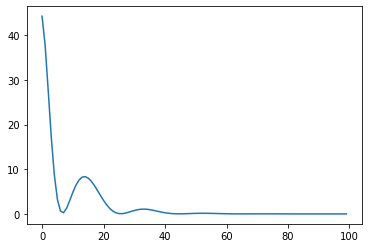

In [109]:
#Nesterov's 
loss_history = []
iters = []
loss = 0

x, y, eta = np.random.uniform(low=-2, high=2, size=1), np.random.uniform(low=-2, high=2, size=1), 0.0001
prev_v_x, prev_v_y, gamma = 0, 0, 0.9
for i in range(100):
    dx, dy = 0, 0
    # do partial update
    iters.append(i)
    loss = x**2 + 100*(y-x**2)**2
    v_x = gamma * prev_v_x
    v_y = gamma * prev_v_y 
    # calculate gradients after partial update
    dx = (2*x - 400*x*(y - x**2))
    dy = (200*(y - x**2))
    # now do the full update    
    v_x = gamma * prev_v_x + eta*dx
    v_y = gamma * prev_v_y + eta*dy
    x = x - v_x
    y = y - v_y
    prev_v_x = v_x
    prev_v_y = v_y
    loss_history.append(loss)
plt.plot(iters, loss_history)
plt.show()

The contour of the gradient descent for Rosenbrock function $f(x, y) = x^2 + 100(y − x^2)^2$ is shown below.

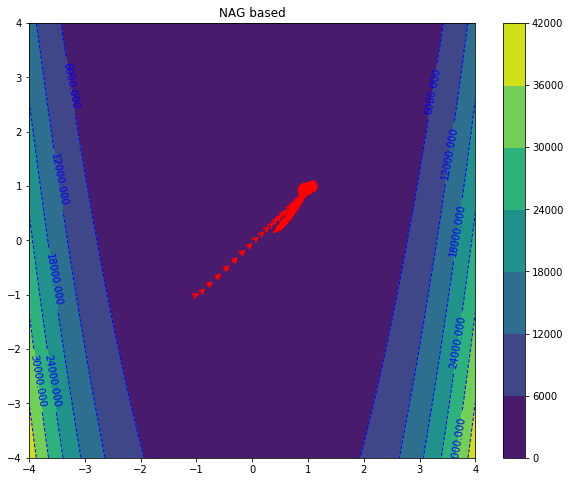

In [110]:
# alpha = 1e-3
#NAG based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
#     print(x, y)
    loss = x**2 + 100*(y-x**2)**2
    return loss

def gradient_descent(x,y,prev_v_x, prev_v_y, alpha = 0.0001,num_iters=2000):
    gamma = 0.9
    dx, dy = 0, 0
    v_x = gamma * prev_v_x
    v_y = gamma * prev_v_y 
    # calculate gradients after partial update
    dx = (2*x - 400*x*(y - x**2))
    dy = (200*(y - x**2))
    # now do the full update    
    v_x = gamma * prev_v_x + alpha*dx
    v_y = gamma * prev_v_y + alpha*dy
    x = x - v_x
    y = y - v_y
    prev_v_x = v_x
    prev_v_y = v_y
    temp = np.zeros((2,))
    temp[0] = x
    temp[1] = y
    #Cost and intermediate values for each iteration
    return temp, prev_v_x, prev_v_y

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    prev_v_x = 0
    prev_v_y = 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd, prev_v_x, prev_v_y = gradient_descent(w[0],w[1], prev_v_x, prev_v_y)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = prev_v_x
        temp_v = prev_v_y
        w_hist.append(w)
        w = copy
        prev_v_x = temp_v
        prev_v_y = temp_r
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'NAG based')
main()

#### Adam's 
Checking whether it'll converge or not below

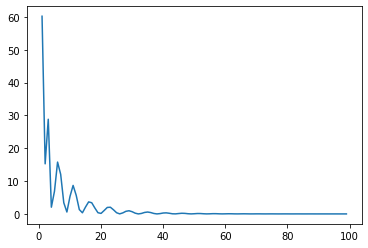

In [111]:
#Adam's 
loss_history = []
iters = []
loss = 0
step_size = 0.4
beta_x_1, beta_x_2 = 0.9, 0.999
beta_y_1, beta_y_2 = 0.9, 0.999
epsilon = 10^(-8)
m_x = 0
m_y = 0
v_x = 0
v_y = 0
x, y = np.random.uniform(low=-2, high=2, size=1), np.random.uniform(low=-2, high=2, size=1)
for t in range(1,100):
    iters.append(t)
    loss = x**2 + 100*(y-x**2)**2
    g_x = (2*x - 400*x*(y - x**2))
    g_y = (200*(y - x**2))
    m_x = beta_x_1 * m_x + (1 - beta_x_1) * g_x
    v_x = beta_x_2 * v_x + (1 - beta_x_2) * np.power(g_x, 2)
    m_x_hat = m_x / (1 - np.power(beta_x_1, t))
    v_x_hat = v_x / (1 - np.power(beta_x_2, t))
    x = x - step_size * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
    
    m_y = beta_y_1 * m_y + (1 - beta_y_1) * g_y
    v_y = beta_y_2 * v_y + (1 - beta_y_2) * np.power(g_y, 2)
    m_y_hat = m_y / (1 - np.power(beta_y_1, t))
    v_y_hat = v_y / (1 - np.power(beta_y_2, t))
    y = y - step_size * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
    loss_history.append(loss)
    
plt.plot(iters, loss_history)
plt.show()

The contour of the gradient descent for Rosenbrock function $f(x, y) = x^2 + 100(y − x^2)^2$ is shown below.

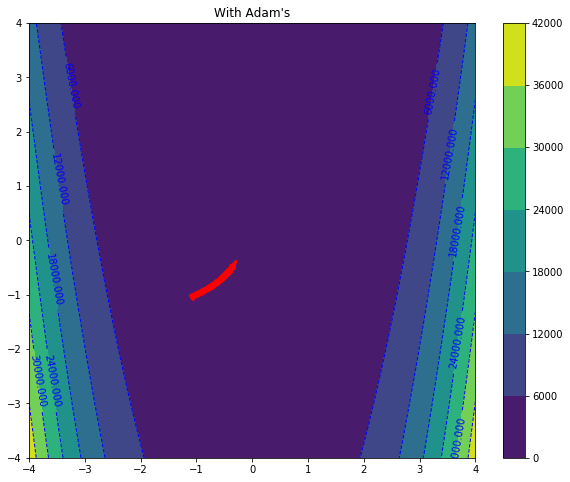

In [112]:
# alpha = 1e-3
#Adam based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
#     print(x, y)
    loss = x**2 + 100*(y-x**2)**2
    return loss

def gradient_descent(x,y, v_x, v_y, m_x, m_y, step_size = 0.001,num_iters=2000):
    beta_x_1, beta_x_2 = 0.9, 0.999
    beta_y_1, beta_y_2 = 0.9, 0.999
    for t in range(1, num_iters):
        g_x = (2*x - 400*x*(y - x**2))
        g_y = (200*(y - x**2))
        m_x = beta_x_1 * m_x + (1 - beta_x_1) * g_x
        v_x = beta_x_2 * v_x + (1 - beta_x_2) * np.power(g_x, 2)
        m_x_hat = m_x / (1 - np.power(beta_x_1, t))
        v_x_hat = v_x / (1 - np.power(beta_x_2, t))
        x = x - step_size * m_x_hat / (np.sqrt(v_x_hat) + epsilon)

        m_y = beta_y_1 * m_y + (1 - beta_y_1) * g_y
        v_y = beta_y_2 * v_y + (1 - beta_y_2) * np.power(g_y, 2)
        m_y_hat = m_y / (1 - np.power(beta_y_1, t))
        v_y_hat = v_y / (1 - np.power(beta_y_2, t))
        y = y - step_size * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
        #Cost and intermediate values for each iteration
        temp = [0,0]
        temp[0] = x
        temp[1] = y
        return temp, v_x, v_y, m_x, m_y 

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    v_x = 0
    v_y = 0
    m_x, m_y = 0, 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd, v_x, v_y, m_x, m_y = gradient_descent(w[0],w[1], v_x, v_y, m_x, m_y)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = v_x
        temp_v = v_y
        temp_m_x = m_x
        temp_m_y = m_y
        w_hist.append(w)
        w = copy
        v_x = temp_v
        v_y = temp_r
        m_x = temp_m_x
        m_y = temp_m_y
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'With Adam\'s')
main()

## Question 3

Given function, $$f(x,y) = \frac{50}{9}(x^2 + y^2)^3 - \frac{209}{18}(x^2 + y^2)^2 + \frac{59}{9}(x^2 + y^2)$$
So, the update rules will be:
$$ x = x - \frac{d}{dx}f(x,y) $$ \
$$ y = y - \frac{d}{dy}f(x,y) $$
This implies the following: \
$$x = x - \eta(\frac{150}{9}*(x^2 + y^2)^2*2x - \frac{418}{18}(x^2 + y^2)*2x + \frac{59}{9}(2x))$$ \
$$y = y - \eta(\frac{150}{9}*(x^2 + y^2)^2*2y - \frac{418}{18}(x^2 + y^2)*2y + \frac{59}{9}(2y))$$

#### Constant Step Size 
Checking whether the it'll converge to optimum or not

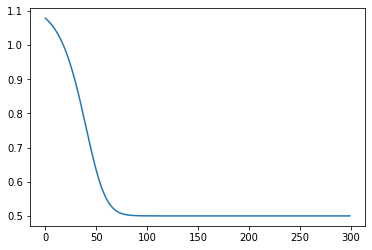

In [113]:
loss_history = []
iters = []
alpha = 0.002
loss = 0
x = np.random.uniform(low=-2, high=2, size=1)
# print(x)
y = np.random.uniform(low=-2, high=2, size=1)
x_list = []
y_list = []
x_list.append(x)
y_list.append(y)
for i in range(300):
    iters.append(i)
    loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
    x = x - alpha*((150/9)*2*x*(x**2 + y**2)**2 - (418/18)*2*x*(x**2 + y**2) + (59/9)*2*x) 
    x_list.append(x)
    y = y - alpha*((150/9)*2*y*(x**2 + y**2)**2 - (418/18)*2*y*(x**2 + y**2) + (59/9)*2*y)
    y_list.append(y)
    loss_history.append(loss)

iters.append(i)
loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
loss_history.append(loss)
x_list = np.array(x_list)
y_list = np.array(y_list)
plt.plot(iters, loss_history)
plt.show()
# print(loss_history[0])
# print(loss_history[-1])

Plotting contours for constant learning rate.  

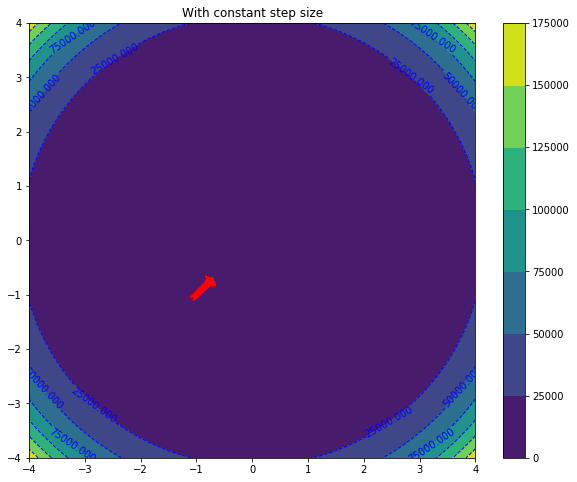

In [114]:
# alpha = 1e-3
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
    loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
    return loss

def gradient_descent(w1,w2, alpha = 0.0001,num_iters=2000):
    x = np.zeros((2,))
    x = w1
    y = w2
    x = x - alpha*((150/9)*2*x*(x**2 + y**2)**2 - (418/18)*2*x*(x**2 + y**2) + (59/9)*2*x) 
    y = y - alpha*((150/9)*2*y*(x**2 + y**2)**2 - (418/18)*2*y*(x**2 + y**2) + (59/9)*2*y)
    temp = [0,0]
    temp[0] = x
    temp[1] = y
    return temp

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)

    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []

    for i in range(20000):
        loss = loss_function(w[0],w[1])
        gd = gradient_descent(w[0],w[1])
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        w_hist.append(w)
        w = copy
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'With constant step size')
main()

#### Polyak's Momentum 
Contour plot for momentum based gradient descent

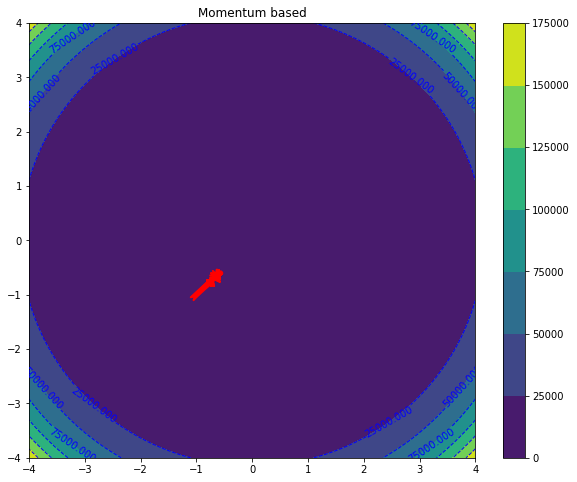

In [115]:
# alpha = 1e-3
#Polyak's Momentum based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
    loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
    return loss

def gradient_descent(w1,w2,r,v,alpha = 0.0001,num_iters=2000):
#     m = np.size(y)
    x = np.zeros((2,))
    x = w1
    y = w2
    beta = 0.9
    v = beta * v + (1 - beta) * ((150/9)*2*x*(x**2 + y**2)**2 - (418/18)*2*x*(x**2 + y**2) + (59/9)*2*x) 
    x = x - alpha * v 
    r = beta * r + (1 - beta) * ((150/9)*2*y*(x**2 + y**2)**2 - (418/18)*2*y*(x**2 + y**2) + (59/9)*2*y)
    y = y - alpha * r
    temp = [0,0]
    temp[0] = x
    temp[1] = y
    return temp,r,v

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    v = 0
    r = 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd,r,v = gradient_descent(w[0],w[1],r,v,alpha = 0.001,num_iters=2000)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = r
        temp_v = v
        w_hist.append(w)
        w = copy
        v = temp_v
        r = temp_r
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'Momentum based')
main()

#### Nesterov's Accelerated Gradient Descent 
Plotting the contour 

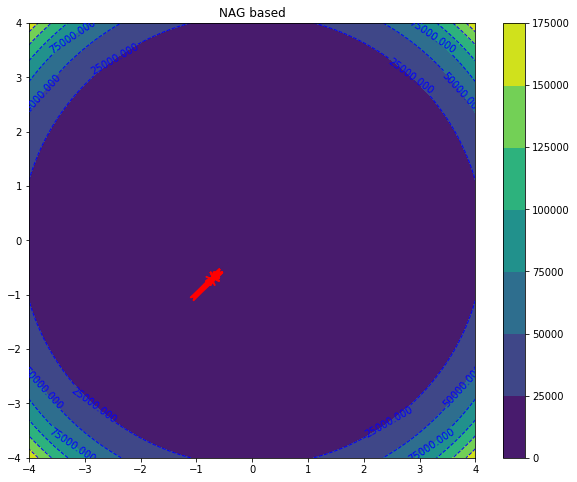

In [116]:
#NAG based 

# alpha = 1e-3
#NAG based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
#     print(x, y)
    loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
    return loss

def gradient_descent(x,y,prev_v_x, prev_v_y, alpha = 0.0001,num_iters=2000):
    gamma = 0.9
    dx, dy = 0, 0
    v_x = gamma * prev_v_x
    v_y = gamma * prev_v_y 
    # calculate gradients after partial update
    dx = ((150/9)*2*x*(x**2 + y**2)**2 - (418/18)*2*x*(x**2 + y**2) + (59/9)*2*x) 
    dy = ((150/9)*2*y*(x**2 + y**2)**2 - (418/18)*2*y*(x**2 + y**2) + (59/9)*2*y)
    # now do the full update    
    v_x = gamma * prev_v_x + alpha*dx
    v_y = gamma * prev_v_y + alpha*dy
    x = x - v_x
    y = y - v_y
    prev_v_x = v_x
    prev_v_y = v_y
    temp = np.zeros((2,))
    temp[0] = x
    temp[1] = y
    #Cost and intermediate values for each iteration
    return temp, prev_v_x, prev_v_y

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    prev_v_x = 0
    prev_v_y = 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(2000):
        loss = loss_function(w[0],w[1])
        gd, prev_v_x, prev_v_y = gradient_descent(w[0],w[1], prev_v_x, prev_v_y)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = prev_v_x
        temp_v = prev_v_y
        w_hist.append(w)
        w = copy
        prev_v_x = temp_v
        prev_v_y = temp_r
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'NAG based')
main()

#### Adam's 
Plotting the contour for Adam's

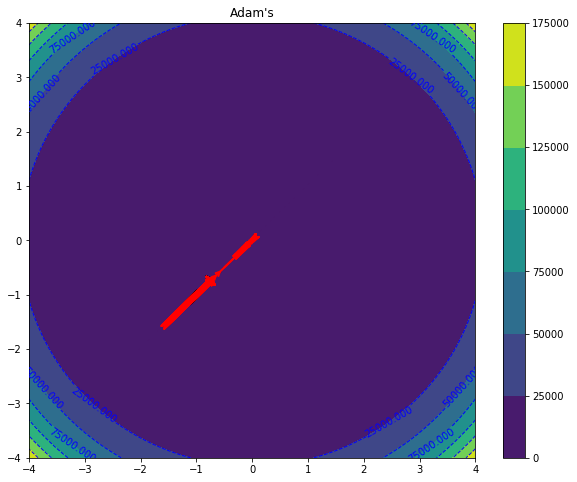

In [117]:
#Adam based 
def plot(x, y, z, w_list, title):
    fig,ax = plt.subplots(1,1,figsize=(10,8))    
    ax.title.set_text(title)
    cp = ax.contour(x,y,z,colors = 'blue',linestyles = 'dashed',linewidths = 1)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(x,y,z)
    fig.colorbar(cp)
    for i in range(len(w_list)-1):
        ax.annotate('',xy = w_list[i+1,:],xytext=w_list[i,:],arrowprops={'arrowstyle': '->','color':'r','lw':2},va='center',ha='center')
    plt.show()


def loss_function(x,y):
    loss = (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)
    return loss

def gradient_descent(x,y, v_x, v_y, m_x, m_y, step_size = 0.001,num_iters=2000):
    beta_x_1, beta_x_2 = 0.9, 0.999
    beta_y_1, beta_y_2 = 0.9, 0.999
    for t in range(1, num_iters):
        g_x = ((150/9)*2*x*(x**2 + y**2)**2 - (418/18)*2*x*(x**2 + y**2) + (59/9)*2*x) 
        g_y = ((150/9)*2*y*(x**2 + y**2)**2 - (418/18)*2*y*(x**2 + y**2) + (59/9)*2*y)
        m_x = beta_x_1 * m_x + (1 - beta_x_1) * g_x
        v_x = beta_x_2 * v_x + (1 - beta_x_2) * np.power(g_x, 2)
        m_x_hat = m_x / (1 - np.power(beta_x_1, t))
        v_x_hat = v_x / (1 - np.power(beta_x_2, t))
        x = x - step_size * m_x_hat / (np.sqrt(v_x_hat) + epsilon)

        m_y = beta_y_1 * m_y + (1 - beta_y_1) * g_y
        v_y = beta_y_2 * v_y + (1 - beta_y_2) * np.power(g_y, 2)
        m_y_hat = m_y / (1 - np.power(beta_y_1, t))
        v_y_hat = v_y / (1 - np.power(beta_y_2, t))
        y = y - step_size * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
        #Cost and intermediate values for each iteration
        temp = [0,0]
        temp[0] = x
        temp[1] = y
        return temp, v_x, v_y, m_x, m_y 

def main():
    x1 = np.linspace(-4,4,400)
    x2 = np.linspace(-4,4,400)
    v_x = 0
    v_y = 0
    m_x, m_y = 0, 0
    X,Y = np.meshgrid(x1,x2)
    w = [np.linspace(-1,1,1),np.linspace(-1,1,1)]

    w_hist = []
    
    for i in range(20000):
        loss = loss_function(w[0],w[1])
        gd, v_x, v_y, m_x, m_y = gradient_descent(w[0],w[1], v_x, v_y, m_x, m_y)
        copy = np.zeros((2,))
        copy[0] = gd[0]
        copy[1] = gd[1]
        temp_r = v_x
        temp_v = v_y
        temp_m_x = m_x
        temp_m_y = m_y
        w_hist.append(w)
        w = copy
        v_x = temp_v
        v_y = temp_r
        m_x = temp_m_x
        m_y = temp_m_y
    
    w_hist = np.array(w_hist)
    z = loss_function(X,Y)
    plot(X,Y,z,w_hist, 'Adam\'s')
main()

### Observations:
- Apart from constant learning rate, we see that the rest of the methods do not directly converge to the minima. They go around and come to minima. 
- It seems like the second function (Question 3) was a more complex function when compared to function given in Question 2. All the methods have performed better in Rosenbrock function.
- Adam, in general, performed the best amongst all the other methods. 
- Makes us understand why initialising parameters well is important

## Question 4 
### Question 4.3

In [118]:
#Generate Data
mu1 = np.zeros((2,1))
mu1, mu2 = np.array([-3,4]), np.array([4,-3])
sigma = np.zeros((2,2))
sigma[0] = np.array([16, 0])
sigma[1] = np.array([0, 9])
cat1 = []
for i in range(200):
    cat1.append(np.random.normal(mu1, sigma, (2,1)))
train1 = np.array(cat1)
cat2 = []
for i in range(200):
    cat2.append(np.random.normal(mu2, sigma, (2,1)))
train2 = np.array(cat2)
#----test data generation ---#
cat1 = []
for i in range(100):
    cat1.append(np.random.normal(mu1, sigma, (2,1)))
test1 = np.array(cat1)
cat2 = []
for i in range(100):
    cat2.append(np.random.normal(mu2, sigma, (2,1)))
test2 = np.array(cat2)

From the given criteria:\
$$y = w_{1}*x_{1} + w_{2}*x_{2} + b$$\
from the above, we know that the training data X is of the form $[x_{1}, x_{2}]$ and b is the bias term 

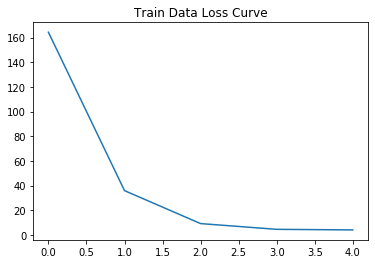

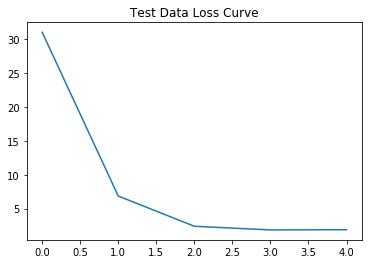

In [119]:
#to train go through cat1 first and then cat2 and assign y its appropriate value 
loss_history = []
test_loss_history = []
iters = []
w1 = 1
w2 = 1
b = 1
alpha = 0.006
n = 400
pred = w1*train1[:,0] + w2*train1[:,1] + b
loss = 0
loss1 = 0
loss2 = 0
for i in range(5): 
    iters.append(i)
    pred1 = w1*train1[:,0] + w2*train1[:,1] + b
    error1 = pred1 - 1 
    loss1 = np.sum(error1**2)
    loss1 = loss1/n
    w1 = w1 - alpha * 2 * np.sum(error1*train1[:,0])/n
    w2 = w2 - alpha * 2 * np.sum(error1*train1[:,1])/n
    b = b - alpha * 2 * np.sum(error1)/n
    
    pred2 = w1*train2[:,0] + w2*train2[:,1] + b
    error2 = pred2 + 1 
    loss2 = np.sum(error2**2)
    loss2 = loss2/n
    w1 = w1 - alpha * 2 * np.sum(error2*train2[:,0])/n
    w2 = w2 - alpha * 2 * np.sum(error2*train2[:,1])/n
    b = b - alpha * 2 * np.sum(error2)/n
    test_pred1 = w1*test1[:,0] + w2*test1[:,1] + b
    test_pred2 = w1*test2[:,0] + w2*test2[:,1] + b
    test_error1 = test_pred1 - 1 
    test_error2 = test_pred2 + 1 
    test_loss1 = np.sum(test_error1**2)
    test_loss2 = np.sum(test_error2**2)
    test_loss_history.append(test_loss1/n+test_loss2/n)
    loss_history.append(loss1+loss2)
    
plt.plot(iters, loss_history)
plt.title('Train Data Loss Curve')
plt.show()

plt.plot(iters, test_loss_history)
plt.title('Test Data Loss Curve')
plt.show()

### Question 4.4
Why is there no risk of overtraining ?

In this, we have only two parameters i.e only 2 weights and there are no quadratic terms. This implies that this is a linear classifier. A linear classifier cannot be overtrained cause the parameters themselves are so few. Here, anyway there are only 2 classes. 

### Question 4.5
This model can achieve atleast Min Bayes Error. How can we be sure?

Min Bayes error is basically the irreducible error. The error caused due the stochasitic nature of the distribution. The model cannot go beyond this error because the distribution is inherently random at times. We cannot model that random nature. That is the irreducible error. So the model will achieve atleast this much error.

### Question 4.6
Preprocessing the data by standardisation 

In [120]:
#Preprocess 
train1 = (train1 - np.mean(train1))/np.std(train1)
train2 = (train2 - np.mean(train2))/np.std(train2)
test1 = (train1 - np.mean(test1))/np.std(test1)
test2 = (train2 - np.mean(test2))/np.std(test2)

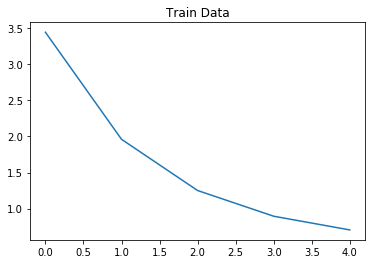

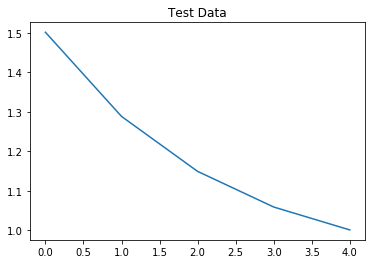

In [121]:
#Run again 
#to train go through cat1 first and then cat2 and assign y its appropriate value 
loss_history = []
iters = []
test_loss_history = []
w1 = 1
w2 = 1
b = 1
alpha = 0.1
n = 400
pred = w1*train1[:,0] + w2*train1[:,1] + b
loss = 0
loss1 = 0
loss2 = 0
for i in range(5): #50 epochs 
    iters.append(i)
    pred1 = w1*train1[:,0] + w2*train1[:,1] + b
    error1 = pred1 - 1 
    loss1 = np.sum(error1**2)
    loss1 = loss1/n
    w1 = w1 - alpha * 2 * np.sum(error1*train1[:,0])/n
    w2 = w2 - alpha * 2 * np.sum(error1*train1[:,1])/n
    b = b - alpha * 2 * np.sum(error1)/n
    
    pred2 = w1*train2[:,0] + w2*train2[:,1] + b
    error2 = pred2 + 1 
    loss2 = np.sum(error2**2)
    loss2 = loss2/n
    w1 = w1 - alpha * 2 * np.sum(error2*train2[:,0])/n
    w2 = w2 - alpha * 2 * np.sum(error2*train2[:,1])/n
    b = b - alpha * 2 * np.sum(error2)/n
    loss_history.append(loss1+loss2)
    test_pred1 = w1*test1[:,0] + w2*test1[:,1] + b
    test_pred2 = w1*test2[:,0] + w2*test2[:,1] + b
    test_error1 = test_pred1 - 1 
    test_error2 = test_pred2 + 1 
    test_loss1 = np.sum(test_error1**2)
    test_loss2 = np.sum(test_error2**2)
    test_loss_history.append(test_loss1/n+test_loss2/n)
    
plt.plot(iters, loss_history)
plt.title('Train Data')
plt.show()

plt.plot(iters, test_loss_history)
plt.title('Test Data')
plt.show()


### Observations:
Preprocessing the data i.e standardisation the data allows us to use higher learning rates. This implies that we can reach a minima in lesser number of epochs. So, it is a good practice to standardise the data before optimising it. We can see this in the code above as well. The learning rate of the preprocessed data is higher and yet it converges. 

## Question 5 

- The below is batch Backpropagation 

#### 25 neurons in the hidden layer  

Test Error for Relu: 46.25382723468031


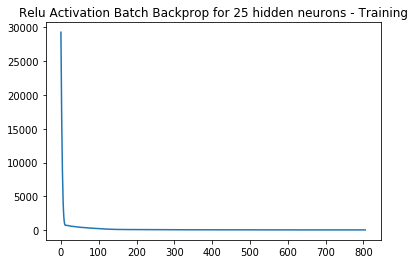

Test Error for Tanh: 295.59424828714316


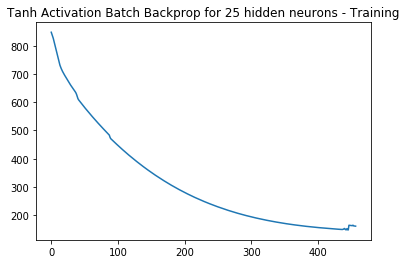

Relu Loss in training 22.105217301192564
Tanh Loss in training 161.23713728849359


In [122]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv("Concrete_Data.csv") 
# data.head()
X = np.zeros((1030, 8))
X[:,0] = data['Cement (component 1)(kg in a m^3 mixture)']
X[:,1] = data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']
X[:,2] = data['Fly Ash (component 3)(kg in a m^3 mixture)']
X[:,3] = data['Water  (component 4)(kg in a m^3 mixture)']
X[:,4] = data['Superplasticizer (component 5)(kg in a m^3 mixture)']
X[:,5] = data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)']
X[:,6] = data['Fine Aggregate (component 7)(kg in a m^3 mixture)']
X[:,7] = data['Age (day)']
Y = data['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
model = MLPRegressor(
    hidden_layer_sizes=(25,),
    activation='relu',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_relu = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Relu:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Relu Activation Batch Backprop for 25 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()
model = MLPRegressor(
    hidden_layer_sizes=(25,),
    activation='tanh',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_tanh = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Tanh:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Tanh Activation Batch Backprop for 25 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()

print("Relu Loss in training", loss_value_relu)
print("Tanh Loss in training", loss_value_tanh)

#### 50 neurons in the hidden layer 

Test Error for Relu: 63.790624951426786


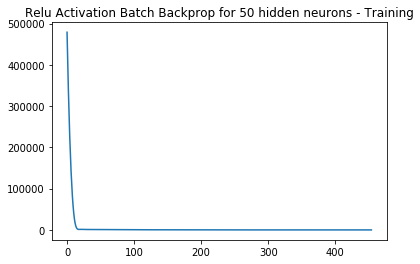

Test Error for Tanh: 257.01718896875263


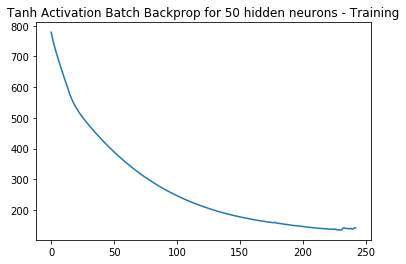

Relu Loss in training 26.36098594766526
Tanh Loss in training 142.3879741105548


In [123]:
model = MLPRegressor(
    hidden_layer_sizes=(50,),
    activation='relu',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_relu = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Relu:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Relu Activation Batch Backprop for 50 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()
model = MLPRegressor(
    hidden_layer_sizes=(50,),
    activation='tanh',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_tanh = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Tanh:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Tanh Activation Batch Backprop for 50 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()

print("Relu Loss in training", loss_value_relu)
print("Tanh Loss in training", loss_value_tanh)

#### 75 neurons in the hidden layer 

Test Error for Relu: 46.676466973538055


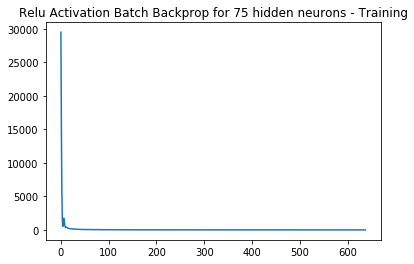

Test Error for Tanh: 278.70803025350676


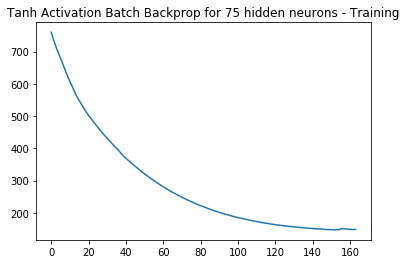

Relu Loss in training 18.80308190903956
Tanh Loss in training 148.4268792423959


In [124]:
model = MLPRegressor(
    hidden_layer_sizes=(75,),
    activation='relu',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_relu = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Relu:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Relu Activation Batch Backprop for 75 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()
model = MLPRegressor(
    hidden_layer_sizes=(75,),
    activation='tanh',
    max_iter = 1000,
    nesterovs_momentum=False
)
model.fit(X_train, y_train)
loss_values = model.loss_curve_
loss_value_tanh = loss_values[-1]
y_pred = model.predict(X_test)
error_test = (y_pred - y_test)
loss = np.sum(error_test**2)/len(y_test)
print("Test Error for Tanh:", loss)
iters = []
for i in range(len(loss_values)):
    iters.append(i)
plt.title('Tanh Activation Batch Backprop for 75 hidden neurons - Training')
plt.plot(iters, loss_values)
plt.show()

print("Relu Loss in training", loss_value_relu)
print("Tanh Loss in training", loss_value_tanh)

### Observations for batch backpropagation:
- It seems like Relu in general performs better. It converges faster and to a better optimum than Tanh 
- Increasing the number of neurons in the hidden increases the risk of overtraining but nonetheless, it seems like 75 neurons in the hidden helps the performace of the MLP. 

### Rprop



This method, unlike previous methods, does not use the magnitude of the gradient to decide the step size. It only uses the gradients sign to decide which direction to go in. 
- When the sign of the sign of the previous gradient and the current gradient is the same then the we increase the step size so that we reach the minima faster. 
- If the current gradient sign of the previous gradient and the current gradient is different then that means we have jumped over the minima. So, we reduce the step size and and go back to the previous parameter values and start over again.  
- Unfortunately there is no implementation of this in sklearn and so I couldn't implement it. But this arguably gives us better results than batch backpropogation. It definitely converges faster too.  

Note: We have maximum value of learning rate so that we dont go too quickly and we have a minumum value of learning rate so that we dont move too slowly 

### Quickprop

Let f(x) be the loss function \
Then we have in batch backpropagation update using $\frac{\partial f}{\partial W}$ where W are a set of parameters.\
Here, in Qprop we update using $\frac{(\frac{\partial f}{\partial W})^t}{(\frac{\partial f}{\partial W})^t - (\frac{\partial f}{\partial W})^{(t-1)}}$
- It arguably converges faster but we have to take care of the learning rate. Batch backpropagation, on most days, gives better results for more complex functions. Again, even Qprop is not available in sklearn so couldn't give the results with the dataset provided.  
